<a href="https://colab.research.google.com/github/muddassirali8089/AASFS/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install -U imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.6 MB/s eta 0:00:00


In [17]:
from imblearn.over_sampling import SMOTE


In [3]:
from google.colab import drive
drive.mount('/content/drive')  # ✅ This is the correct mount path

# Now import pandas and read your dataset
import pandas as pd

# ✅ Make sure the file path is correct (case-sensitive!)
data = pd.read_csv('/content/drive/MyDrive/DataSets/customer_churn_dataset-training-master.csv')
test_Data = pd.read_csv('/content/drive/MyDrive/DataSets/customer_churn_dataset-testing-master.csv')






Mounted at /content/drive


In [5]:
# Data Cleaning and Preprocessing
print("Step 1: Initial Data Inspection")
print("\nTraining Data Shape:", data.shape)
print("Test Data Shape:", test_Data.shape)

print("\nChecking for missing values in training data:")
print(data.isnull().sum())
print("\nChecking for missing values in test data:")
print(test_Data.isnull().sum())

# Drop unnecessary columns
columns_to_drop = ['CustomerID']  # Add any other unnecessary columns here
data = data.drop(columns_to_drop, axis=1)
test_Data = test_Data.drop(columns_to_drop, axis=1)

# Handle missing values
data = data.dropna()
test_Data = test_Data.dropna()

# Check for and handle outliers using IQR method
def handle_outliers(df, columns):
    df_clean = df.copy()
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean[column] = df_clean[column].clip(lower=lower_bound, upper=upper_bound)
    return df_clean

# List of numerical columns to check for outliers
numerical_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls',
                    'Payment Delay', 'Total Spend', 'Last Interaction']

print("\nStep 2: Handling Outliers")
data = handle_outliers(data, numerical_columns)
test_Data = handle_outliers(test_Data, numerical_columns)

# Verify data types and convert if necessary
print("\nStep 3: Verifying Data Types")
print("\nTraining Data Info:")
print(data.info())
print("\nTest Data Info:")
print(test_Data.info())

# Check value distributions
print("\nStep 4: Value Distributions")
print("\nTraining Data Description:")
print(data.describe())

# Check unique values in categorical columns
categorical_columns = ['Gender', 'Subscription Type', 'Contract Length']
print("\nStep 5: Checking Categorical Values")
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(data[col].value_counts())

print("\nFinal Data Shapes:")
print("Training Data:", data.shape)
print("Test Data:", test_Data.shape)

Step 1: Initial Data Inspection

Training Data Shape: (440833, 12)
Test Data Shape: (64374, 12)

Checking for missing values in training data:
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

Checking for missing values in test data:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

Step 2: Handling Outliers

Step 3: Verifying Data Types

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---

In [6]:
data.isnull().sum()






,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0
Last Interaction,0


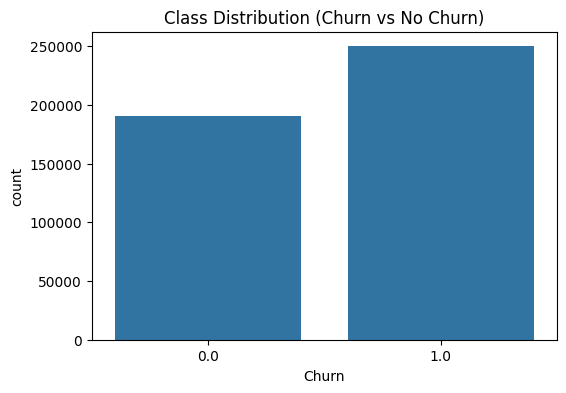

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Class Distribution (Churn vs No Churn)')
plt.show()

# Print counts
print(data['Churn'].value_counts())


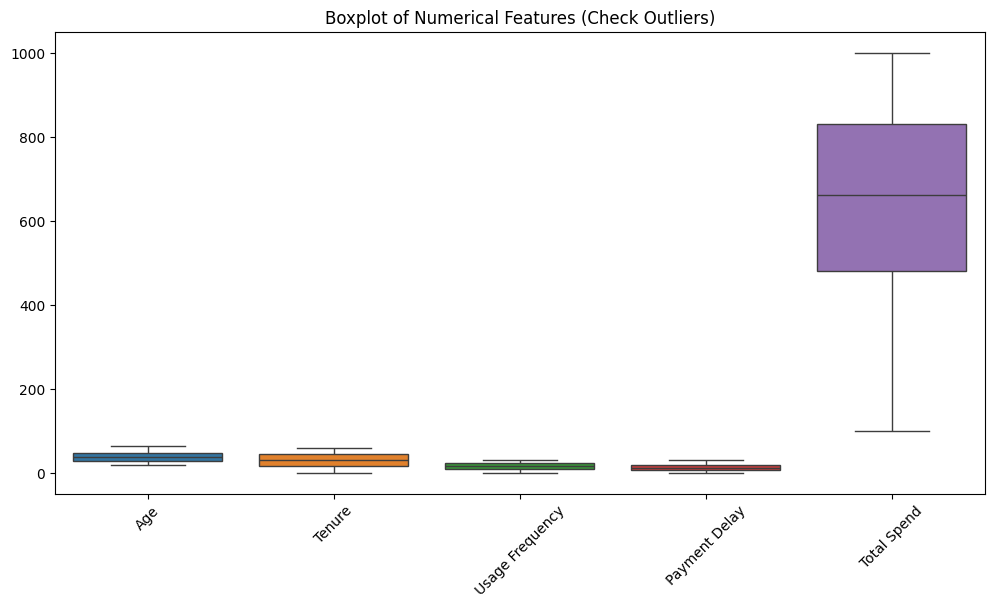

In [8]:
numerical_cols = ['Age', 'Tenure', 'Usage Frequency', 'Payment Delay', 'Total Spend']
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_cols])
plt.title('Boxplot of Numerical Features (Check Outliers)')
plt.xticks(rotation=45)
plt.show()



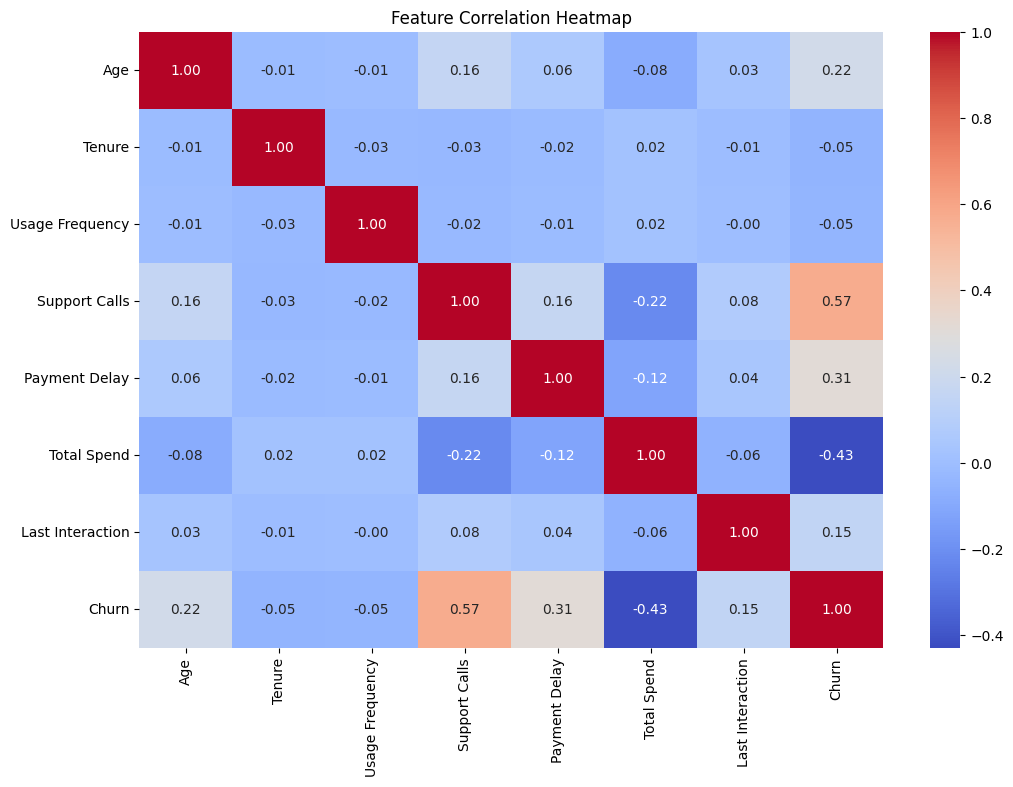

In [9]:
# Calculate correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

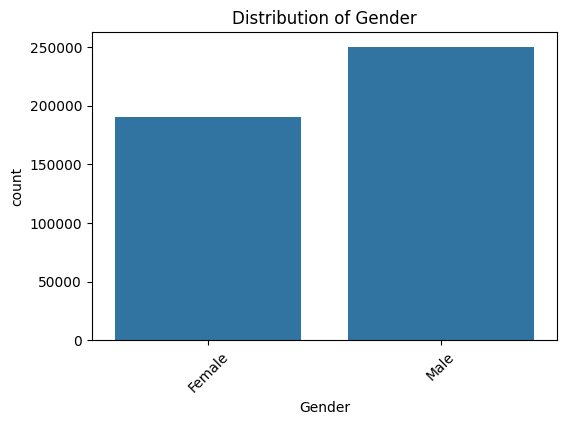

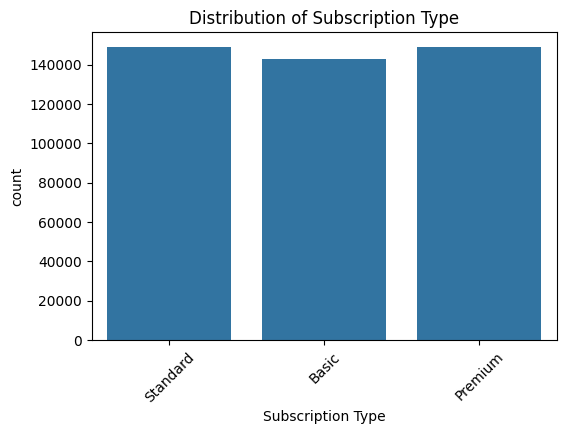

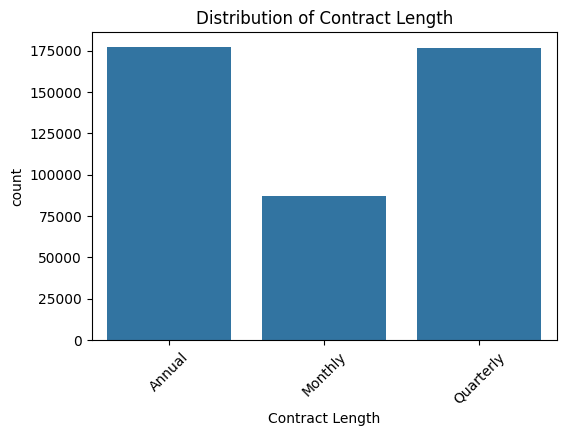

In [10]:
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


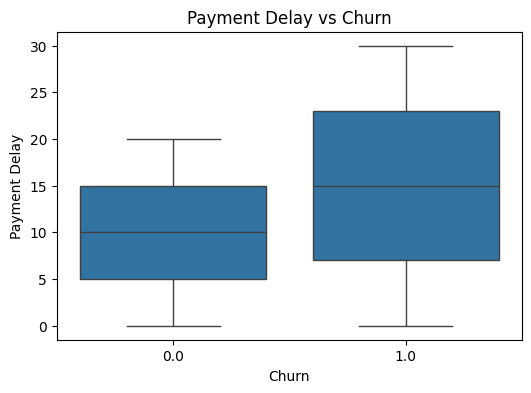

In [11]:
# Example: Payment Delay vs Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='Payment Delay', data=data)
plt.title('Payment Delay vs Churn')
plt.show()

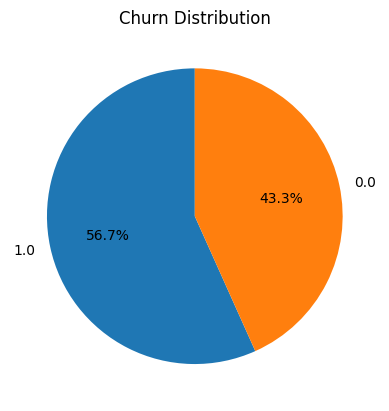

In [12]:
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Churn Distribution")
plt.ylabel("")
plt.show()


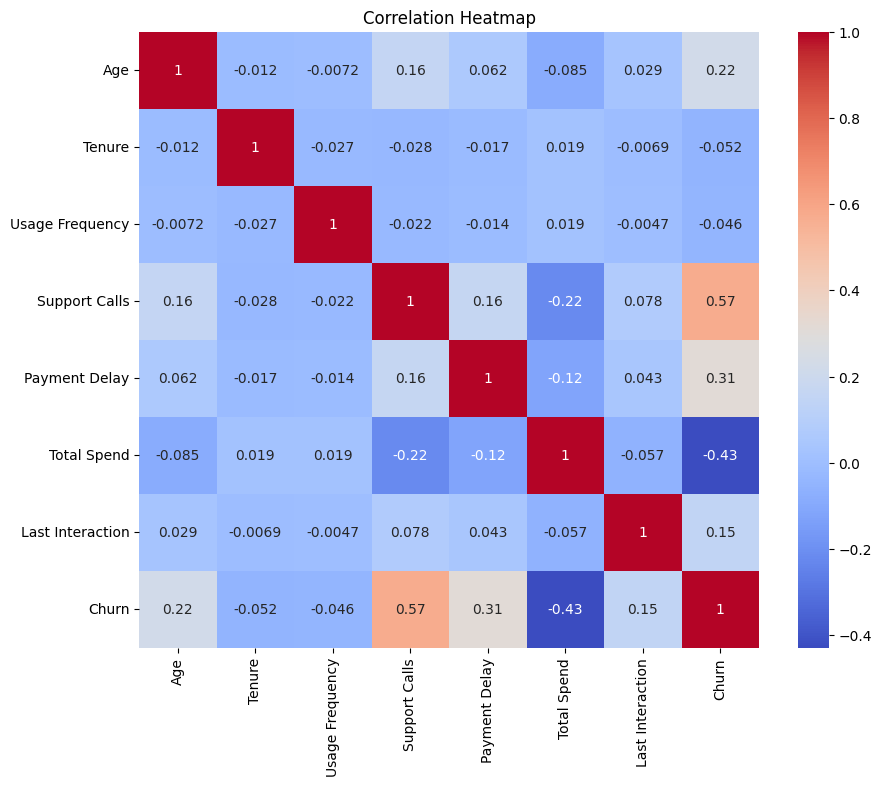

In [13]:
# Use only numeric columns for correlation
corr = data.select_dtypes(include=['number']).corr()

# Now plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



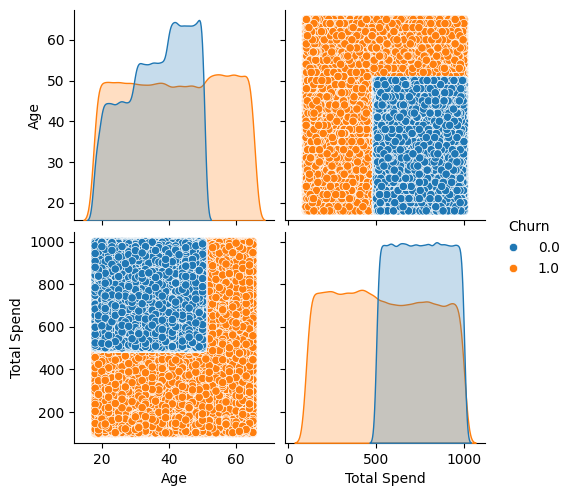

In [14]:
sns.pairplot(data[['Age', 'Total Spend', 'Churn']], hue='Churn')
plt.show()


In [18]:
# Import required libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Step 1: Feature Engineering")

# Create new features
data['Usage_per_Tenure'] = data['Usage Frequency'] / (data['Tenure'] + 1)  # Adding 1 to avoid division by zero
test_Data['Usage_per_Tenure'] = test_Data['Usage Frequency'] / (test_Data['Tenure'] + 1)

data['Calls_per_Usage'] = data['Support Calls'] / (data['Usage Frequency'] + 1)
test_Data['Calls_per_Usage'] = test_Data['Support Calls'] / (test_Data['Usage Frequency'] + 1)

data['Spend_per_Usage'] = data['Total Spend'] / (data['Usage Frequency'] + 1)
test_Data['Spend_per_Usage'] = test_Data['Total Spend'] / (test_Data['Usage Frequency'] + 1)

print("\nStep 2: Encoding Categorical Variables")
# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical variables
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']
for col in categorical_cols:
    # Fit on training data and transform both training and test
    le_fitted = le.fit(data[col])
    data[col] = le_fitted.transform(data[col])
    test_Data[col] = le_fitted.transform(test_Data[col])

    # Print encoding mapping
    print(f"\nEncoding mapping for {col}:")
    for i, label in enumerate(le_fitted.classes_):
        print(f"{label} -> {i}")

# Create dummy variables for categorical columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
test_Data = pd.get_dummies(test_Data, columns=categorical_cols, drop_first=True)

print("\nStep 3: Feature Scaling")
# List of numerical columns for scaling
numerical_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls',
                 'Payment Delay', 'Total Spend', 'Last Interaction',
                 'Usage_per_Tenure', 'Calls_per_Usage', 'Spend_per_Usage']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
test_Data[numerical_cols] = scaler.transform(test_Data[numerical_cols])

print("\nFinal feature set:")
print(f"Number of features: {data.shape[1]-1}")  # -1 for target variable
print("\nFeature names:")
print(data.columns.tolist())

Step 1: Feature Engineering

Step 2: Encoding Categorical Variables

Encoding mapping for Gender:
Female -> 0
Male -> 1

Encoding mapping for Subscription Type:
Basic -> 0
Premium -> 1
Standard -> 2

Encoding mapping for Contract Length:
Annual -> 0
Monthly -> 1
Quarterly -> 2

Step 3: Feature Scaling

Final feature set:
Number of features: 15

Feature names:
['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn', 'Usage_per_Tenure', 'Calls_per_Usage', 'Spend_per_Usage', 'Gender_1', 'Subscription Type_1', 'Subscription Type_2', 'Contract Length_1', 'Contract Length_2']


In [19]:
test_Data.head(5)

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Usage_per_Tenure,Calls_per_Usage,Spend_per_Usage,Gender_1,Subscription Type_1,Subscription Type_2,Contract Length_1,Contract Length_2
0,-1.396291,-0.362566,-0.210511,0.128839,1.699466,-0.139601,-0.637592,1,-0.265049,-0.161080,-0.305782,False,False,False,True,False
1,0.130751,-0.188711,1.420007,1.105969,0.004151,-0.197740,0.642043,0,0.027179,-0.205543,-0.587768,False,False,True,True,False
2,0.612974,-0.246662,-0.676373,-0.522581,1.941654,0.520691,0.758374,0,-0.389122,-0.310270,0.108028,True,True,False,False,False
3,-0.351473,-1.289796,-0.443442,0.454549,0.488527,-1.659517,0.409382,0,0.187633,0.046309,-0.620525,True,True,False,False,True
4,1.095198,1.549845,0.954145,1.757390,-1.327882,-0.409531,0.409382,0,-0.355157,0.003028,-0.570873,False,False,True,False,False


In [22]:
from sklearn.metrics import accuracy_score

In [30]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_recall_curve,
    average_precision_score, roc_curve, confusion_matrix,
    classification_report
)

# Resampling
from imblearn.over_sampling import SMOTE


In [31]:
print("Step 1: Preparing data for modeling...")

# Split features and target
X_train = data.drop('Churn', axis=1)
y_train = data['Churn']
X_test = test_Data.drop('Churn', axis=1)
y_test = test_Data['Churn']

print("✅ Train and test data prepared.")


Step 1: Preparing data for modeling...
✅ Train and test data prepared.


             Age    Tenure  Usage Frequency  Support Calls  Payment Delay  \
0      -0.753326  0.448760        -0.210511       0.454549       0.609620   
1       2.059646  1.028278        -1.724562       2.083100      -0.601319   
2       1.255940 -1.000036        -1.375166       0.780259       0.609620   
3       1.497051  0.390808         0.604748       1.105969      -0.722413   
4      -1.315921  0.043097         0.488282       0.454549      -0.601319   
...          ...       ...              ...            ...            ...   
440828  0.211121  1.318037        -0.094045      -0.848291      -1.206788   
440829 -1.155179 -1.347747        -0.326976      -0.848291       0.851808   
440830 -1.074809  0.216952         1.303541      -0.848291      -0.964600   
440831 -0.914068  1.375989        -0.210511      -0.522581      -1.570070   
440832 -0.672956  0.970326         0.488282      -0.848291       0.125245   

        Total Spend  Last Interaction  Usage_per_Tenure  Calls_per_Usage  \

In [32]:
print("\nStep 2: Applying SMOTE to handle class imbalance...")

# SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("✅ SMOTE applied.")
print("Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts(normalize=True))



Step 2: Applying SMOTE to handle class imbalance...
✅ SMOTE applied.
Class distribution after SMOTE:
Churn
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


In [33]:
print("\nStep 3: Training Random Forest model...")

# Define parameter grid
param_grid = {
    'n_estimators': [50],        # fewer trees = faster
    'max_depth': [10, 15],       # fewer combinations
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'class_weight': ['balanced']
}

# Initialize model
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# Grid search setup
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train_balanced, y_train_balanced)

print("\n✅ Best parameters found:")
print(grid_search.best_params_)
print("✅ Best cross-validation score:", grid_search.best_score_)

# Best model
rf_model = grid_search.best_estimator_



Step 3: Training Random Forest model...
Fitting 5 folds for each of 2 candidates, totalling 10 fits

✅ Best parameters found:
{'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
✅ Best cross-validation score: 0.9999894221605585


In [34]:
print("\nStep 4: Making predictions and evaluating...")

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

print(f"\n✅ Test Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Average Precision: {avg_precision:.4f}")



Step 4: Making predictions and evaluating...

✅ Test Metrics:
Accuracy: 0.5070
ROC AUC: 0.6435
Average Precision: 0.5603


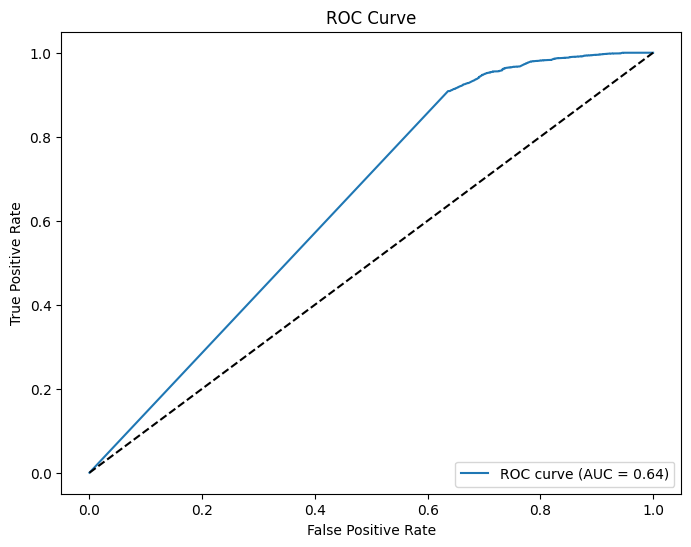

In [35]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


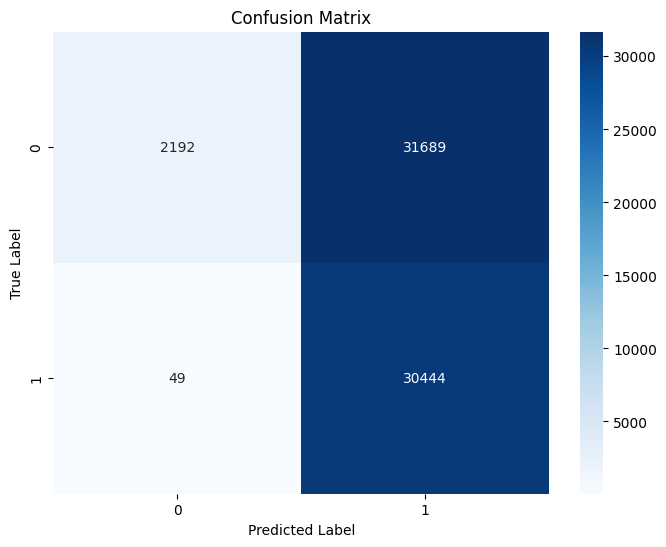

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [37]:
# Print full report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.06      0.12     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.51     64374
   macro avg       0.73      0.53      0.39     64374
weighted avg       0.75      0.51      0.38     64374




Step 5: Analyzing Feature Importance...


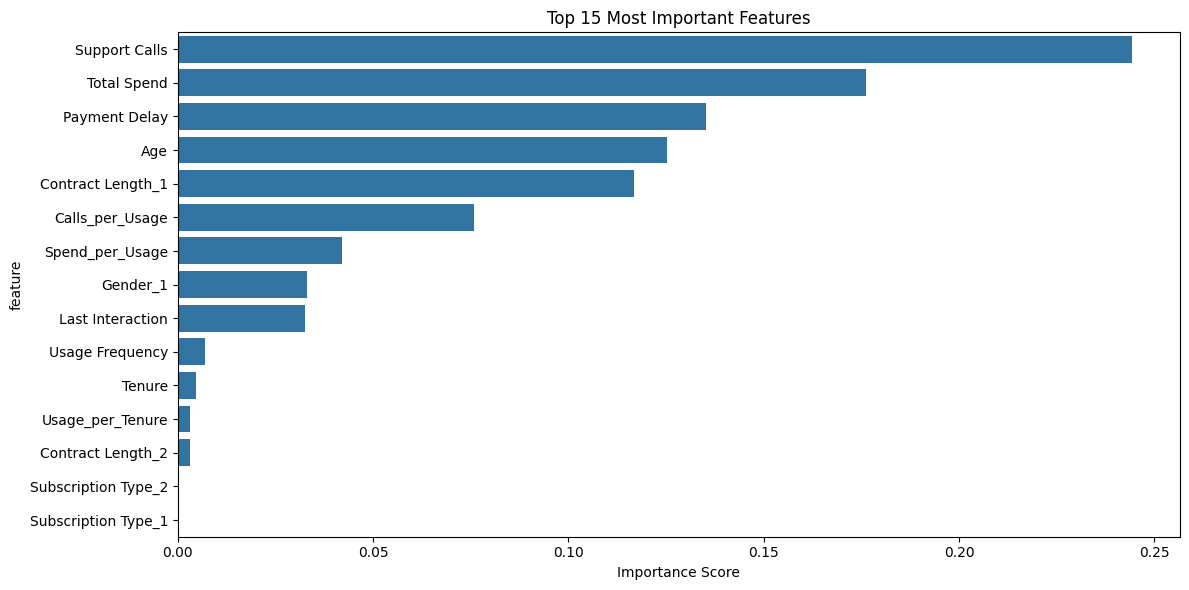


Top 10 Most Important Features:
              feature  importance
3       Support Calls    0.244364
5         Total Spend    0.176173
4       Payment Delay    0.135264
0                 Age    0.125248
13  Contract Length_1    0.116774
8     Calls_per_Usage    0.075792
9     Spend_per_Usage    0.041973
10           Gender_1    0.033160
6    Last Interaction    0.032577
2     Usage Frequency    0.006975


In [38]:
print("\nStep 5: Analyzing Feature Importance...")

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


In [39]:
# Save predictions to DataFrame
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability': y_pred_proba
})

print("\nSample of predictions:")
print(predictions_df.head(10))



Sample of predictions:
   Actual  Predicted  Probability
0       1        1.0     1.000000
1       0        1.0     1.000000
2       0        1.0     0.962612
3       0        1.0     1.000000
4       0        1.0     1.000000
5       0        1.0     1.000000
6       1        1.0     1.000000
7       0        1.0     1.000000
8       0        1.0     1.000000
9       0        1.0     1.000000
